In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

/home/zishraq/anaconda3/envs/cse475_project/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [52]:
df = pd.read_csv('train.csv')

In [53]:
df.shape

(1460, 81)

In [54]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot: >

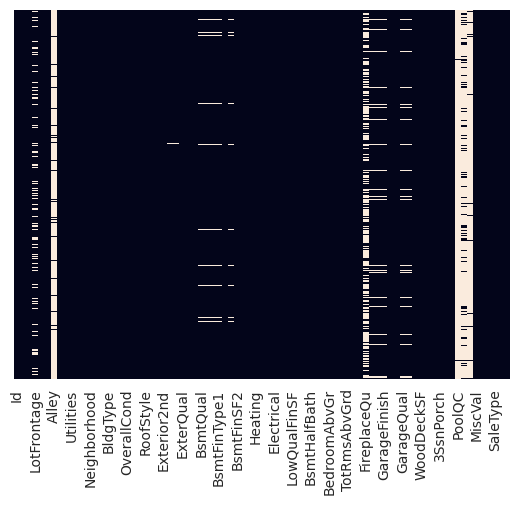

In [56]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [57]:
df.shape

(1460, 81)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [59]:
# Filling Missing Values

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df.drop(['Alley'], axis=1, inplace=True)
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

df.drop(['GarageYrBlt'], axis=1, inplace=True)

df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

df.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

df.drop(['Id'], axis=1, inplace=True)

In [60]:
df.dropna(inplace=True)

<AxesSubplot: >

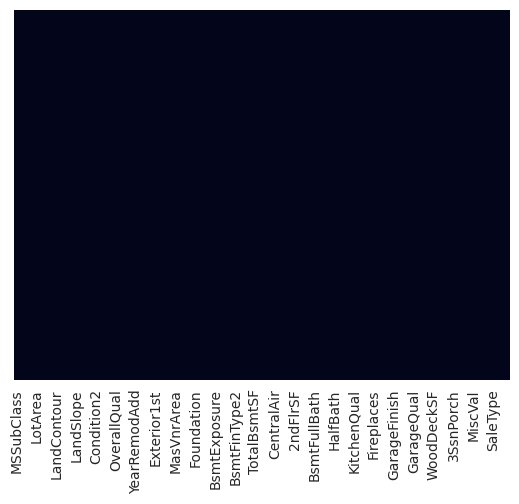

In [61]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [62]:
df.shape

(1422, 75)

In [63]:
## Handle Test Data

test_df = pd.read_csv('test.csv')

In [64]:
test_df.shape

(1459, 80)

In [65]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [66]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [67]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

test_df.drop(['Alley'],axis=1,inplace=True)

test_df['BsmtCond'] = test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])

test_df.drop(['GarageYrBlt'],axis=1,inplace=True)

test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

test_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])

test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])

test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])

test_df['Utilities'] = test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

test_df_id = test_df['Id']

test_df.drop(['Id'],axis=1,inplace=True)


In [68]:
test_df.shape

(1459, 74)

In [69]:
## Handle Categorical Features

In [70]:
columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
'Condition2','BldgType','Condition1','HouseStyle','SaleType',
'SaleCondition','ExterCond',
'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
'CentralAir',
'Electrical','KitchenQual','Functional',
'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']


In [71]:
def category_onehot_multi_columns(multi_columns):
    df_final = final_df
    i = 0

    for field in multi_columns:
        print(field)

        df1 = pd.get_dummies(final_df[field], drop_first=True)
        
        final_df.drop([field], axis=1, inplace=True)

        if i == 0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final, df1], axis=1)

        i = i + 1
       
    df_final = pd.concat([final_df, df_final], axis=1)
        
    return df_final


In [72]:
final_df = pd.concat([df, test_df], axis=0)

In [73]:
final_df = category_onehot_multi_columns(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [74]:
final_df.shape

(2881, 235)

In [75]:
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [76]:
final_df.shape

(2881, 175)

In [77]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [78]:
df_train = final_df.iloc[:1422, :]
df_test = final_df.iloc[1422:, :]

In [79]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [80]:
df_test.shape

(1459, 175)

In [81]:
df_test.drop(['SalePrice'], axis=1, inplace=True)

/tmp/ipykernel_4698/2086669381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice'], axis=1, inplace=True)


In [82]:
columns = list(df_test.columns)

In [83]:
X = df_train.drop(['SalePrice'], axis=1)
Y = df_train['SalePrice']

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [85]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

In [86]:
# predicting y for test dataset

Y_pred = regressor.predict(X_test)

print(Y_pred)

[188363.16578857 170089.06418085 416516.80734065 235097.46984397
 121577.87728912 172935.34034067 137141.96325501 162526.20770535
 211001.31345522 135232.96646081 163669.31079477 123766.25782184
 145413.58760495 293429.33763822 218164.70444864 212020.15301852
 322465.68931283 125497.58127895 221107.52832523 217390.23623311
 154452.9619424   99761.99134713  78862.41144461 253986.45414484
 231797.26133975 201873.32856913 197195.0230928  212400.80321636
 231381.3541266  313835.48835051 183163.24686101 123711.65802851
 184479.81468749 182748.16261742 179970.91705314 319956.48201063
 374773.80334843 636056.3210448  136871.9348612   80400.44432508
 136682.88082967 169998.12160295 190429.70516615  98318.35625468
 308274.85842256 190474.41959924 149125.79651955 272376.89043142
 118382.5570525  199121.51628663  89417.43359827 318751.7437448
 132234.98692806 333736.66390193 191397.23969662 206436.94175245
 104361.7587962  161485.80495129  95111.50017913 182549.12404331
 300533.51252062 186909.01

In [87]:
# comparing result

y_test = np.asarray(Y_test)
y_pred = np.asarray(Y_pred)
compare_result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(compare_result)

       Actual      Predicted
0    194000.0  188363.165789
1    168000.0  170089.064181
2    466500.0  416516.807341
3    295493.0  235097.469844
4    130000.0  121577.877289
..        ...            ...
280  142000.0  134872.032630
281   52500.0   69187.575688
282  213250.0  190445.146232
283  360000.0  348423.479326
284  100000.0   86143.224952

[285 rows x 2 columns]


In [88]:
print('MAE: ', metrics.mean_absolute_error(compare_result.Actual, compare_result.Predicted) )
print('MSE: ', metrics.mean_squared_error(compare_result.Actual, compare_result.Predicted) )
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(compare_result.Actual, compare_result.Predicted)))
print('R-squared: ', metrics.r2_score(compare_result.Actual, compare_result.Predicted))

MAE:  22032.131936950063
MSE:  3393135356.399698
RMSE:  148.43224695782942
R-squared:  0.39365299463056747


<AxesSubplot: >

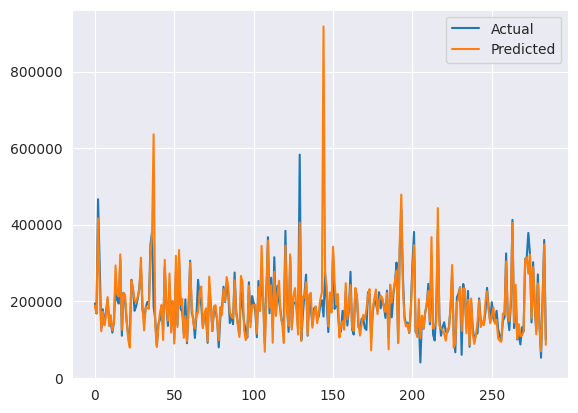

In [89]:
compare_result.plot(kind='line')

In [90]:
Y_df_test_pred = regressor.predict(df_test)

print(Y_df_test_pred)

[116358.02632821 180179.00789399 184772.96861056 ... 175848.09991119
 107178.42845709 235763.81268502]


In [91]:
df_result = pd.DataFrame(
    {
        'Id': test_df_id,
        'SalePrice': Y_df_test_pred
    }
)

In [92]:
df_result

,Id,SalePrice
0,1461,116358.026328
1,1462,180179.007894
2,1463,184772.968611
3,1464,188406.858381
4,1465,223632.196884
...,...,...
1454,2915,73378.807166
1455,2916,64001.258854
1456,2917,175848.099911
1457,2918,107178.428457


In [93]:
df_result.to_csv('linear_regression_result.csv', index = False, encoding='utf-8')

In [94]:
clf = RandomForestRegressor(n_estimators=1000)

clf.fit(X_train, Y_train)
Y_rnd_pred = clf.predict(X_test)

In [95]:
Y_rnd_pred

array([196102.59      , 176638.405     , 415138.589     , 242871.072     ,
       162349.461     , 189605.263     , 138120.776     , 168187.861     ,
       191248.288     , 142591.88      , 164249.431     , 109656.172     ,
       135782.65      , 303912.35      , 226741.727     , 193885.414     ,
       303452.817     , 117155.709     , 233897.4       , 193686.655     ,
       134035.694     , 111484.457     , 120145.425     , 275919.102     ,
       225855.403     , 177544.971     , 181587.151     , 189783.669     ,
       258255.269     , 317145.021     , 204695.084     , 119698.017     ,
       173991.274     , 204410.078     , 191185.285     , 315965.835     ,
       407425.819     , 618851.908     , 148002.39      ,  94542.518     ,
       137320.34866667, 133949.956     , 175598.34      , 120671.921     ,
       287907.486     , 202354.56      , 134192.091     , 253492.807     ,
       141035.81      , 206204.429     ,  92699.598     , 337927.783     ,
       141640.34      , 3

In [96]:
# comparing result

y_test = np.asarray(Y_test)
y_rnd_pred = np.asarray(Y_rnd_pred)
compare_rnd_result = pd.DataFrame(
    {
        'Actual': y_test.flatten(),
        'Predicted': y_rnd_pred.flatten()
    }
)
print(compare_rnd_result)

       Actual   Predicted
0    194000.0  196102.590
1    168000.0  176638.405
2    466500.0  415138.589
3    295493.0  242871.072
4    130000.0  162349.461
..        ...         ...
280  142000.0  135655.237
281   52500.0   76359.437
282  213250.0  220593.757
283  360000.0  349357.091
284  100000.0  122689.783

[285 rows x 2 columns]


In [97]:
print('MAE: ', metrics.mean_absolute_error(compare_rnd_result.Actual, compare_rnd_result.Predicted) )
print('MSE: ', metrics.mean_squared_error(compare_rnd_result.Actual, compare_rnd_result.Predicted) )
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(compare_rnd_result.Actual, compare_rnd_result.Predicted)))
print('R-squared: ', metrics.r2_score(compare_rnd_result.Actual, compare_rnd_result.Predicted))

MAE:  20003.254865497078
MSE:  2006383744.149391
RMSE:  141.4328634564721
R-squared:  0.6414629399937246


<AxesSubplot: >

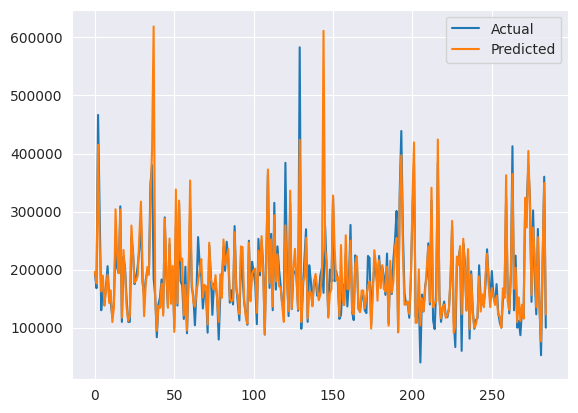

In [98]:
compare_rnd_result.plot(kind='line')

In [99]:
Y_df_test_rnd_pred = clf.predict(df_test)

print(Y_df_test_rnd_pred)

[127440.271 154089.965 175918.746 ... 151916.63  117478.152 227967.247]


In [100]:
df_result = pd.DataFrame(
    {
        'Id': test_df_id,
        'SalePrice': Y_df_test_rnd_pred
    }
)

In [101]:
df_result.to_csv('random_forest_result.csv', index = False, encoding='utf-8')